In [1]:
import pandas as pd

df=pd.read_csv('/home/anu/Downloads/Boosting dataset/churn_modelling.csv')
#about whether person will opt to leave bank or not
df.shape

(9832, 14)

# use randomized search cv(randomly selecting the optimal parameter)

In [2]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0.0
9,10,15592389,H?,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0


In [3]:
sum(df.isnull().values.ravel())

11

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True)

#removing null values

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,9827,15686917,Tu,789.0,Spain,Female,40.0,4.0,0.00,2.0,1.0,0.0,137402.27,0.0
9827,9828,15807312,Hsia,602.0,Spain,Male,33.0,5.0,0.00,2.0,0.0,1.0,64038.34,0.0
9828,9829,15574523,Cheng,576.0,France,Male,39.0,1.0,0.00,2.0,1.0,1.0,68814.23,0.0
9829,9830,15724200,Cheng,584.0,France,Male,38.0,1.0,115341.55,1.0,0.0,1.0,173632.92,0.0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

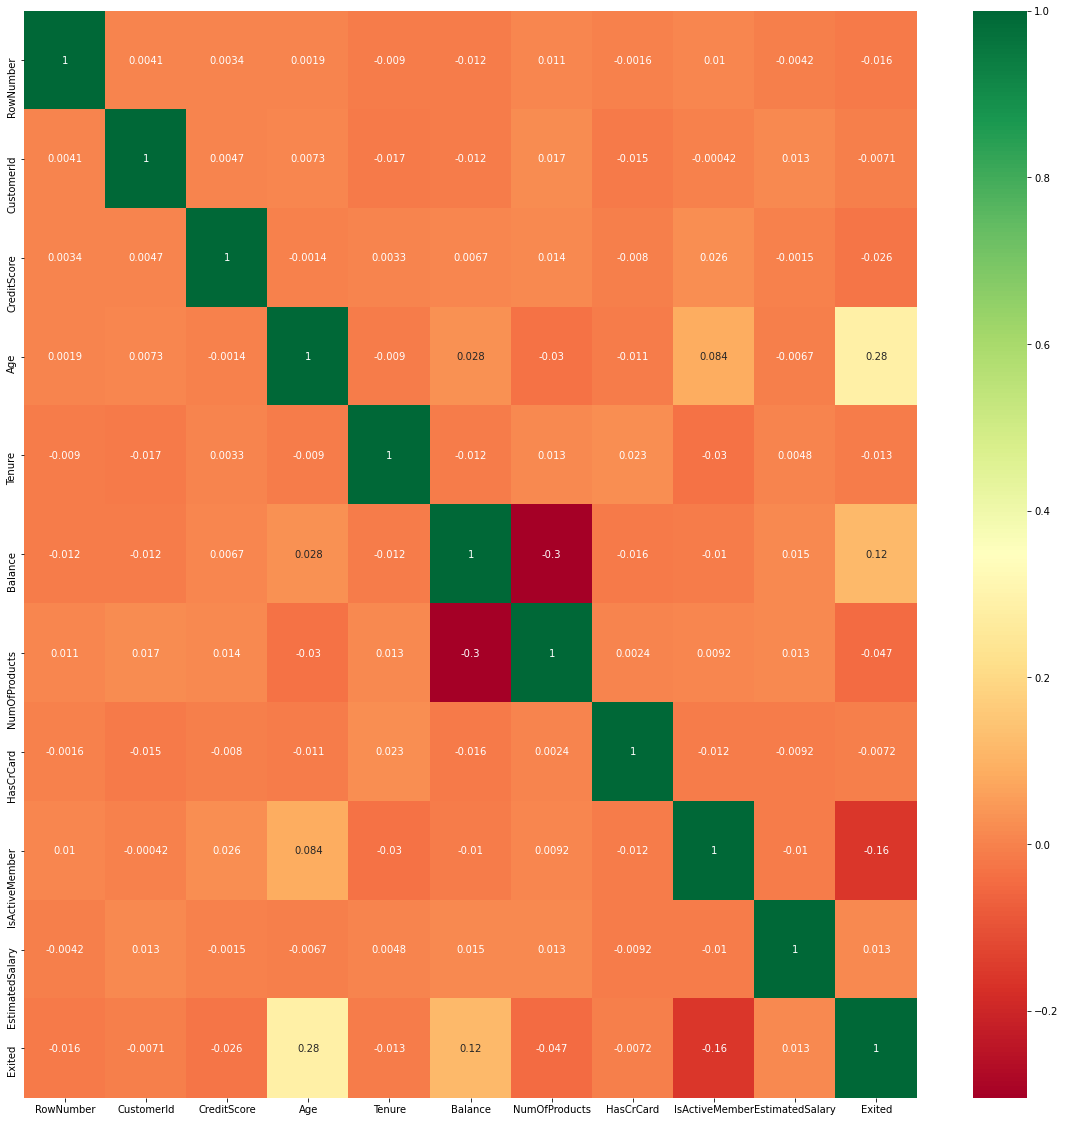

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,9827,15686917,Tu,789.0,Spain,Female,40.0,4.0,0.00,2.0,1.0,0.0,137402.27,0.0
9827,9828,15807312,Hsia,602.0,Spain,Male,33.0,5.0,0.00,2.0,0.0,1.0,64038.34,0.0
9828,9829,15574523,Cheng,576.0,France,Male,39.0,1.0,0.00,2.0,1.0,1.0,68814.23,0.0
9829,9830,15724200,Cheng,584.0,France,Male,38.0,1.0,115341.55,1.0,0.0,1.0,173632.92,0.0


In [10]:
x=df.iloc[:,3:13] #initial columns are not necessary,so taken from 3rd column
y=df.iloc[:,13] 
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9826,789.0,Spain,Female,40.0,4.0,0.00,2.0,1.0,0.0,137402.27
9827,602.0,Spain,Male,33.0,5.0,0.00,2.0,0.0,1.0,64038.34
9828,576.0,France,Male,39.0,1.0,0.00,2.0,1.0,1.0,68814.23
9829,584.0,France,Male,38.0,1.0,115341.55,1.0,0.0,1.0,173632.92


In [11]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9826    0.0
9827    0.0
9828    0.0
9829    0.0
9830    0.0
Name: Exited, Length: 9831, dtype: float64

# #converting text data  columns geography into numbers


In [12]:

geography=pd.get_dummies(x['Geography'],drop_first=True)

In [13]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [14]:
gender=pd.get_dummies(x['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [15]:
x=x.drop(['Gender','Geography'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [16]:
x=pd.concat([x,geography,gender],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0,0,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,1,0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0,0,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,1,0


In [17]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[0,1,3,5,7],#in regression 1st value is 1, in classification its 0
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]#30%,40% of the column will be consider here (ie, sample data)
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

# creating a timer to calculate the time taken for randomized search cv,collecting start and end time


In [19]:

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin,tsec=divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.'%(thour,tmin,round(tsec, 2)))
        


In [20]:
#creating the model

classifier=xgboost.XGBClassifier()

In [21]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,
                                n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
from datetime import datetime

start_time=timer(None)
random_search.fit(x,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/anu/yes/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 17.53 seconds.


In [22]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [24]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)

[20:46:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [26]:
score

array([0.86686992, 0.86571719, 0.87080366, 0.86978637, 0.8636826 ,
       0.85045778, 0.86164802, 0.8819939 , 0.85961343, 0.85656155])

In [27]:
score.mean()

0.8647134415138658

In [ ]:
#under sampling->

#over sampling

#SMOTF->adding more data to minority data points

#Synthetic Minority Over Sampling Technique
#=> it artificially creating extra data points sample